In [1]:
import numpy as np
import pandas as pd
import datetime as dt

d = pd.read_csv("Feature.csv")

from collections import Counter
Counter(d["Target"])

Counter({0: 3769, 1: 5195})

In [2]:
d.iloc[:,1:207]

,e1.m1,e2.m1,e3.m1,e4.m1,e5.m1,e6.m1,e7.m1,e8.m1,e9.m1,e10.m1,...,e94.m2,e95.m2,e96.m2,e97.m2,e98.m2,e99.m2,e100.m2,e101.m2,e102.m2,e103.m2
0,8,10,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,21,0,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,19,0,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,13,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,12,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8959,0,0,7,0,0,10,0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
8960,0,0,14,0,0,24,2,19,0,0,...,0,0,0,0,0,0,0,0,0,0
8961,3,9,0,0,2,0,0,0,5,2,...,0,0,0,0,0,0,0,0,0,0
8962,0,13,0,15,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import statsmodels.api as sm
x = pd.DataFrame(d.iloc[:,1:-1])
y = d["Target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 123, stratify = y)
#x_train = x
#y_train = y
pd.concat([x_train,y_train],axis = 1).to_csv("train.csv", index = False)
pd.concat([x_test,y_test],axis = 1).to_csv("test.csv", index = False)

In [40]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
x_train = train.iloc[:,:-1]
x_test = test.iloc[:,:-1]
y_train = train["Target"]
y_test = test["Target"]

In [43]:
model = LogisticRegression(penalty = "l1", solver = "liblinear", C = 0.01).fit(x_train, y_train)

coef = pd.DataFrame(model.coef_)
columns = pd.DataFrame(x_train.columns).transpose()
coef_df = pd.concat([columns, coef]).transpose()
coef_df.columns = ["Feature", "Coefficient"]

relevant_features = list(coef_df[coef_df["Coefficient"] != 0]["Feature"])

In [44]:
len(relevant_features)

383

In [45]:
relevant_features

['e2.m1',
 'e3.m1',
 'e15.m1',
 'e25.m1',
 'e1.m2',
 'e2.m2',
 'e3.m2',
 'e5.m2',
 'e6.m2',
 'e12.m2',
 'min(D1)',
 'max(D1)',
 'mean(D1)',
 'mean(V1)',
 'max(D2)',
 'mean(D2)',
 'mean(V2)',
 'std(V2)',
 'min(D3)',
 'max(D3)',
 'mean(D3)',
 'mean(V3)',
 'std(V3)',
 'min(D4)',
 'mean(D4)',
 'mean(V4)',
 'min(D5)',
 'max(D5)',
 'mean(D5)',
 'std(V5)',
 'min(D6)',
 'max(D6)',
 'mean(D6)',
 'mean(V6)',
 'std(V6)',
 'min(D7)',
 'max(D7)',
 'mean(V7)',
 'std(V7)',
 'min(D8)',
 'max(D8)',
 'mean(D8)',
 'mean(V8)',
 'std(V8)',
 'min(D9)',
 'max(D9)',
 'mean(D9)',
 'mean(V9)',
 'std(V9)',
 'min(D10)',
 'max(D10)',
 'mean(D10)',
 'mean(V10)',
 'std(V10)',
 'min(D11)',
 'mean(D11)',
 'mean(V11)',
 'std(V11)',
 'min(D12)',
 'max(D12)',
 'mean(D12)',
 'mean(V12)',
 'std(V12)',
 'min(D13)',
 'max(D13)',
 'mean(D13)',
 'mean(V13)',
 'std(V13)',
 'min(D14)',
 'max(D14)',
 'mean(D14)',
 'mean(V14)',
 'std(V14)',
 'min(D15)',
 'max(D15)',
 'mean(D15)',
 'mean(V15)',
 'std(V15)',
 'min(D16)',
 'max(D16)'

In [7]:
#logit_model = sm.Logit(y_train, sm.add_constant(x_train[relevant_features]))
#result = logit_model.fit()
#result.summary()

In [8]:
var = []
p = []
for col in relevant_features:#x_train.columns.tolist():
    logit_model = sm.Logit(y_train, sm.add_constant(x_train[col]))
    result = logit_model.fit()
    if result.pvalues[0] < 0.05:
        var.append(col)
        p.append(result.pvalues[0])

Optimization terminated successfully.
         Current function value: 0.679883
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.679049
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.680399
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680284
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680403
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.678902
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.677406
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.677913
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.675600
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.680423
  

Optimization terminated successfully.
         Current function value: 0.680424
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680395
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.679821
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680063
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.679804
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680426
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680340
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680343
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680422
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.679658
  

Optimization terminated successfully.
         Current function value: 0.679779
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680409
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.679941
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680249
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680174
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680265
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680402
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.679636
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.679219
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.679315
  

Optimization terminated successfully.
         Current function value: 0.680168
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680411
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680425
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680405
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680416
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680402
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680426
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680302
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680425
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680155
  

Optimization terminated successfully.
         Current function value: 0.678828
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.678063
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.678337
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.679152
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.679890
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.677910
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.677688
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.677710
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.679194
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.679229
  

c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [9]:
len(var), len(p)

(381, 381)

In [40]:
#corr_matrix = x_train[var].corr().abs()
#high_corr_var=np.where(corr_matrix>0.9)
#high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
#len(high_corr_var)

In [118]:
#pred = []
#from scipy import stats
#for col in var:
#    pvalue = stats.pointbiserialr(x_train[col],y_train)[1]
#    if pvalue < 0.05:
#        pred.append(col)

#var = pred

In [119]:
#len(pred)

163

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

In [39]:
rf_model = RandomForestClassifier(max_depth = 5, min_samples_split = 5, min_samples_leaf = 2, n_estimators = 50, max_samples = 0.8).fit(x_train[var], y_train)
acc_train = rf_model.score(x_train[var], y_train)
acc_test = rf_model.score(x_test[var], y_test)
print(acc_train, acc_test)

print(precision_score(y_train, rf_model.predict(x_train[var])), recall_score(y_train, rf_model.predict(x_train[var])),f1_score(y_train, rf_model.predict(x_train[var])))
print(precision_score(y_test, rf_model.predict(x_test[var])), recall_score(y_test, rf_model.predict(x_test[var])),f1_score(y_test, rf_model.predict(x_test[var])))

0.6297880252882112 0.5970440602342443
0.6124201277955271 0.9839589348732756 0.7549538461538461
0.593335299321734 0.9682386910490857 0.7357835070396782


In [12]:
from sklearn.metrics import precision_recall_curve, auc, roc_curve
tp, fp, t = roc_curve(y_test, rf_model.predict_proba(x_test[var])[:,1])
#rf_model.classes_
auc(tp,fp)

0.6488591164734505

In [13]:
rf_model.feature_importances_

array([7.69347932e-03, 8.78848331e-03, 4.62709372e-03, 2.90520493e-03,
       3.48098481e-03, 1.33163107e-02, 1.01239705e-02, 1.47518409e-02,
       1.93901977e-02, 3.90372835e-03, 1.66469318e-02, 3.09004275e-03,
       3.88950800e-03, 1.72228375e-03, 1.11196661e-02, 3.37683836e-03,
       1.09101962e-02, 9.08915539e-03, 2.53827140e-04, 1.39551955e-03,
       1.77646210e-03, 4.44164090e-03, 3.16171440e-03, 0.00000000e+00,
       1.82450314e-03, 7.87296594e-04, 6.95598398e-03, 2.53169719e-02,
       6.31198845e-03, 1.01198064e-03, 5.09524913e-05, 6.15377863e-04,
       1.74341420e-03, 2.52503813e-03, 4.56189587e-03, 0.00000000e+00,
       2.67194558e-04, 0.00000000e+00, 6.41726337e-04, 5.60746510e-04,
       6.88681016e-03, 4.35470134e-03, 4.07187380e-03, 4.04185101e-03,
       2.72196097e-03, 7.19716098e-03, 8.36116290e-03, 4.35418013e-03,
       1.78837202e-03, 3.43554636e-03, 1.11577183e-03, 1.93645830e-04,
       3.59510178e-03, 1.64877122e-03, 5.65220734e-03, 1.58990885e-03,
      

In [14]:
imp_df = pd.DataFrame({'feature': var, 'importance': rf_model.feature_importances_},).sort_values(by='importance', ascending=False, ignore_index = True)
print(imp_df.head())
var = imp_df.feature.tolist()
print(var)

     feature  importance
0  mean(V51)    0.027968
1    max(D5)    0.025317
2  mean(V12)    0.021922
3   max(D51)    0.020734
4      e6.m2    0.019390
['mean(V51)', 'max(D5)', 'mean(V12)', 'max(D51)', 'e6.m2', 'max(D12)', 'min(D1)', 'e5.m2', 'std(V12)', 'e2.m2', 'max(D25)', 'mean(D51)', 'max(D54)', 'max(D2)', 'mean(V2)', 'e3.m2', 'max(D13)', 'max(D26)', 'std(V2)', 'mean(D12)', 'e3.m1', 'std(V39)', 'min(D23)', 'mean(D9)', 'max(D62)', 'max(D68)', 'min(D25)', 'mean(V39)', 'e2.m1', 'max(D53)', 'mean(V13)', 'max(D9)', 'max(D23)', 'mean(D54)', 'min(D5)', 'min(D82)', 'max(D8)', 'mean(V19)', 'max(D40)', 'min(D39)', 'min(D13)', 'min(D18)', 'mean(D5)', 'min(D40)', 'std(V19)', 'max(D84)', 'max(D18)', 'mean(V46)', 'max(D28)', 'min(D11)', 'mean(D25)', 'mean(V40)', 'std(V18)', 'min(D12)', 'max(D22)', 'max(D15)', 'mean(V26)', 'max(D94)', 'max(D86)', 'mean(V55)', 'max(D39)', 'e15.m1', 'std(V6)', 'mean(D86)', 'max(D46)', 'min(D19)', 'mean(V3)', 'mean(V25)', 'mean(D8)', 'mean(V9)', 'min(D20)', 'max(D14)'

In [15]:
feature_list = []
old_f1 = 0
f1_list = []
for name in var:
    x = x_train[feature_list + [name]]
    model = RandomForestClassifier(max_depth = 5, min_samples_split = 5, min_samples_leaf = 2, n_estimators = 50, max_samples = 0.8).fit(x, y_train)
    new_f1 = f1_score(y_train, model.predict(x))
    if (new_f1 - old_f1) > 0.0001 : 
        feature_list += [name]
       # print("F1 score : %.5f"%new_f1)
        f1_list.append(new_f1)
    old_f1 = new_f1
    

In [16]:
len(feature_list)

190

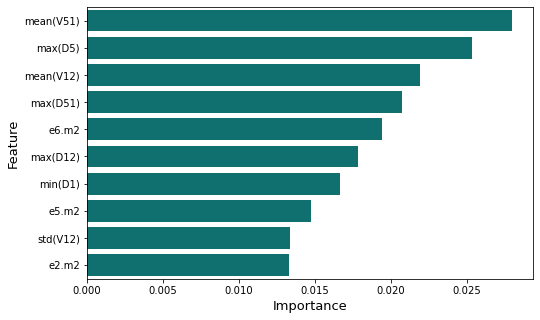

In [17]:
import seaborn as sns
plt.figure(figsize = (8,5))
sns.barplot(imp_df.importance[:10],var[:10], orient = "h", color = "teal")
plt.xlabel("Importance", size = 13)
plt.ylabel("Feature", size = 13)
plt.show()

In [18]:
len(feature_list)

190

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

rf_model = RandomForestClassifier(max_depth = 5, min_samples_split = 5, min_samples_leaf = 2, n_estimators = 50, max_samples = 0.8).fit(x_train[feature_list], y_train)
acc_train = rf_model.score(x_train[feature_list], y_train)
acc_test = rf_model.score(x_test[feature_list], y_test)
print(acc_train, acc_test)

print(precision_score(y_train, rf_model.predict(x_train[feature_list])), recall_score(y_train, rf_model.predict(x_train[feature_list])),f1_score(y_train, rf_model.predict(x_train[feature_list])))
print(precision_score(y_test, rf_model.predict(x_test[feature_list])), recall_score(y_test, rf_model.predict(x_test[feature_list])),f1_score(y_test, rf_model.predict(x_test[feature_list])))

0.6195611751580513 0.5925822643614055
0.6052269601100413 0.9881296118062239 0.7506702412868632
0.5895500725689405 0.9773820981713186 0.7354698533405757


In [20]:
from sklearn.metrics import precision_recall_curve, auc, roc_curve
tp, fp, t = roc_curve(y_test, rf_model.predict_proba(x_test[feature_list])[:,1])
#rf_model.classes_
auc(tp,fp)

0.6486457851995007

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

rf_model = RandomForestClassifier(max_depth = 5, min_samples_split = 5, min_samples_leaf = 2, n_estimators = 50, max_samples = 0.8).fit(x_train, y_train)
acc_train = rf_model.score(x_train, y_train)
acc_test = rf_model.score(x_test, y_test)
print(acc_train, acc_test)

print(precision_score(y_train, rf_model.predict(x_train)), recall_score(y_train, rf_model.predict(x_train)),f1_score(y_train, rf_model.predict(x_train)))
print(precision_score(y_test, rf_model.predict(x_test)), recall_score(y_test, rf_model.predict(x_test)),f1_score(y_test, rf_model.predict(x_test)))

0.6087764968389736 0.5909090909090909
0.5982922569377062 0.9890920757138274 0.7455864570737606
0.5881165272569945 0.9812319538017324 0.7354373309287647


In [22]:
from sklearn.metrics import precision_recall_curve, auc, roc_curve
tp, fp, t = roc_curve(y_test, rf_model.predict_proba(x_test)[:,1])
#rf_model.classes_
auc(tp,fp)

0.6565074495217039

In [97]:
"mean(D59)" in feature_list

False

In [101]:
[t in feature_list for t in imp_df[imp_df["importance"] == 0]["feature"].tolist()]

[False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False]